<a href="https://colab.research.google.com/github/JoshDumo/SentimentAnalysis/blob/main/VADERSent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sentences = ["Naman is smart, boring, and creative.",  # base example
             "Naman is smart, boring, and creative!!!!!!",  # using punctuations
             "Naman is SMART, boring, and CREATIVE.",  # using CAPS
             "Naman is smart, boring, and super creative.",  # using degree modifiers (example 1)
             "Naman is smart, slightly boring, and creative.",  # using degree modifiers (example 2)
             "Naman is smart, boring, and creative but procrastinates a lot.",  # Polarity shift due to Conjunctions
             "Naman isn't smart at all.",  # Catching Polarity Negation
             ]

comments = ["  - base example",
           "  - using punctuations",
           "  - using CAPS",
           "  - using degree modifiers (example 1)",
           "  - using degree modifiers (example 2)",
           "  - Polarity shift due to Conjunctions",
           "  - Catching Polarity Negation"]

In [ ]:
for i in range(len(sentences)):
    vs = analyzer.polarity_scores(sentences[i])
    print("{:-<65} {:-<65} {}".format(sentences[i], comments[i],  str(vs)))

Naman is smart, boring, and creative.----------------------------   - base example------------------------------------------------- {'neg': 0.211, 'neu': 0.275, 'pos': 0.514, 'compound': 0.5106}
Naman is smart, boring, and creative!!!!!!-----------------------   - using punctuations------------------------------------------- {'neg': 0.226, 'neu': 0.393, 'pos': 0.38, 'compound': 0.3753}
Naman is SMART, boring, and CREATIVE.----------------------------   - using CAPS--------------------------------------------------- {'neg': 0.186, 'neu': 0.243, 'pos': 0.571, 'compound': 0.6971}
Naman is smart, boring, and super creative.----------------------   - using degree modifiers (example 1)--------------------------- {'neg': 0.155, 'neu': 0.203, 'pos': 0.642, 'compound': 0.802}
Naman is smart, slightly boring, and creative.-------------------   - using degree modifiers (example 2)--------------------------- {'neg': 0.177, 'neu': 0.353, 'pos': 0.47, 'compound': 0.5154}
Naman is smart, boring, and 

In [ ]:
import pandas as pd
import numpy as np

import pandas_datareader as pdr
import matplotlib.pyplot as plt

data_amd = pdr.get_data_yahoo('AMD', '24-Feb-20') 
data_amd.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-24,50.279999,47.490002,48.180000,49.119999,86624100,49.119999
2020-02-25,51.240002,47.119999,51.139999,47.570000,88699400,47.570000
2020-02-26,49.290001,47.070000,47.700001,47.490002,86378400,47.490002
2020-02-27,46.240002,42.209999,45.380001,44.009998,106416200,44.009998
2020-02-28,46.150002,41.040001,41.360001,45.480000,100667700,45.480000


In [ ]:
data_amd['2_SMA'] = data_amd['Close'].rolling(window=2).mean()
data_amd['5_SMA'] = data_amd['Close'].rolling(window=5).mean()

data_amd = data_amd[data_amd['5_SMA'].notna()]

# SMA trade calls
Trade_Buy=[]
Trade_Sell=[]
for i in range(len(data_amd)-1):
    if ((data_amd['2_SMA'].values[i] < data_amd['5_SMA'].values[i]) & (data_amd['2_SMA'].values[i+1] > data_amd['5_SMA'].values[i+1])):
        print("Trade Call for {row} is Buy.".format(row=data_amd.index[i].date()))
        Trade_Buy.append(i)
    elif ((data_amd['2_SMA'].values[i] > data_amd['5_SMA'].values[i]) & (data_amd['2_SMA'].values[i+1] < data_amd['5_SMA'].values[i+1])):
        print("Trade Call for {row} is Sell.".format(row=data_amd.index[i].date()))
        Trade_Sell.append(i)

Trade Call for 2020-02-28 is Buy.
Trade Call for 2020-03-06 is Sell.
Trade Call for 2020-03-20 is Buy.
Trade Call for 2020-03-31 is Sell.
Trade Call for 2020-04-03 is Buy.
Trade Call for 2020-04-20 is Sell.
Trade Call for 2020-04-22 is Buy.
Trade Call for 2020-05-04 is Buy.
Trade Call for 2020-05-12 is Sell.
Trade Call for 2020-05-14 is Buy.
Trade Call for 2020-05-21 is Sell.
Trade Call for 2020-05-29 is Buy.
Trade Call for 2020-06-03 is Sell.
Trade Call for 2020-06-05 is Buy.
Trade Call for 2020-06-11 is Sell.
Trade Call for 2020-06-16 is Buy.
Trade Call for 2020-06-18 is Sell.
Trade Call for 2020-06-19 is Buy.
Trade Call for 2020-06-23 is Sell.
Trade Call for 2020-06-30 is Buy.
Trade Call for 2020-07-13 is Sell.
Trade Call for 2020-07-15 is Buy.
Trade Call for 2020-08-07 is Sell.
Trade Call for 2020-08-12 is Buy.
Trade Call for 2020-08-18 is Sell.
Trade Call for 2020-08-19 is Buy.
Trade Call for 2020-08-27 is Sell.
Trade Call for 2020-08-28 is Buy.
Trade Call for 2020-09-02 is Sell.


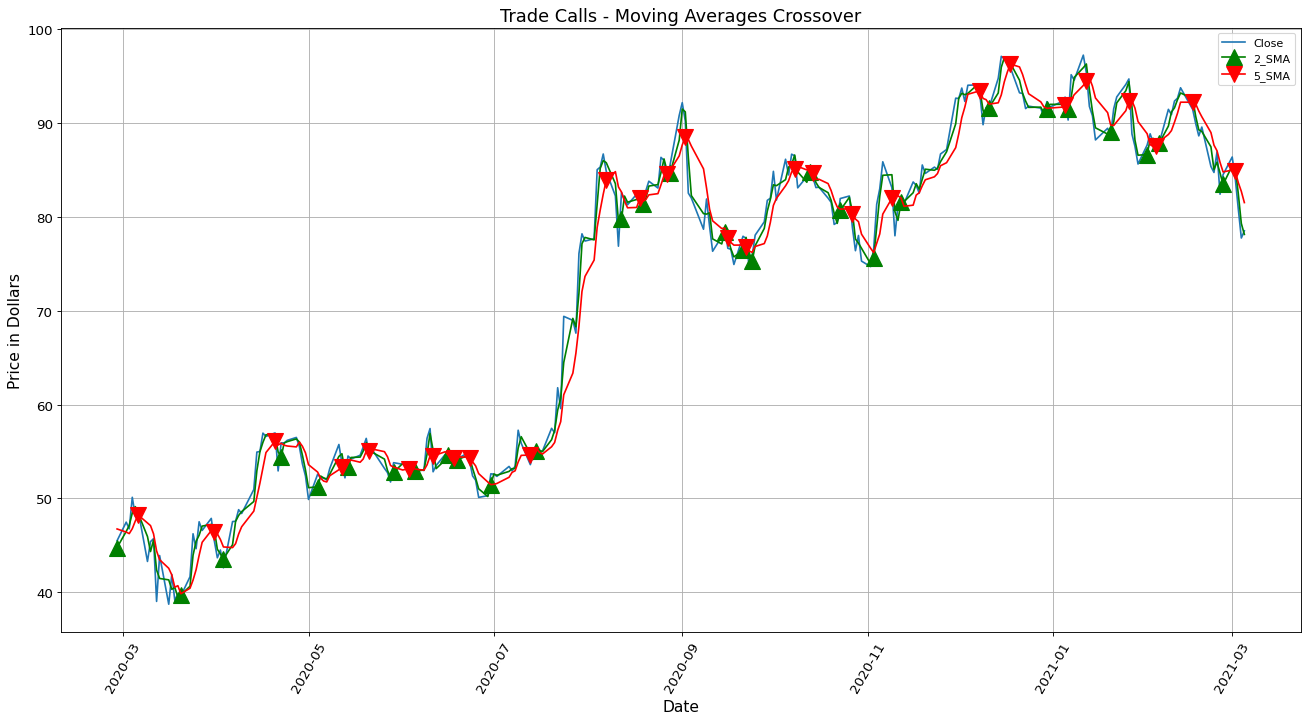

In [ ]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_amd.index, data_amd['Close'])
plt.plot(data_amd.index, data_amd['2_SMA'],'-^', markevery=Trade_Buy, ms=15, color='green')
plt.plot(data_amd.index, data_amd['5_SMA'],'-v', markevery=Trade_Sell, ms=15, color='red')
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation='60',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - Moving Averages Crossover', fontsize = 16)
plt.legend(['Close','2_SMA','5_SMA'])
plt.grid()
plt.show() 

In [ ]:
import requests 
# Define the endpoint
url = 'https://newsapi.org/v2/everything?'

# Specify the query and number of returns
parameters = {
    'q': 'AMD', # query phrase
    'sortBy': 'popularity', # articles from popular sources and publishers come first
    'pageSize': 100,  # maximum is 100 for developer version
    'apiKey': '3397bd94750c452fb55d640aaf77fac5', # your own API key
}

# Make the request
response = requests.get(url, params=parameters)

# Convert the response to JSON format and store it in dataframe
data = pd.DataFrame(response.json())

news_df = pd.concat([data['articles'].apply(pd.Series)], axis=1)
final_news = news_df.loc[:,['publishedAt','title']]
final_news['publishedAt'] = pd.to_datetime(final_news['publishedAt'])
final_news.sort_values(by='publishedAt',inplace=True)

# Import BDay to determine business day's dates
from pandas.tseries.offsets import BDay

# to get the business day for which particular news headline should be used to make trade calls
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=13,minute=30) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=20,minute=0) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=20,minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=13,minute=30)
    
    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
      return None
      
 # Apply the above function to get the trading time for each news headline
final_news["trading_time"] = final_news["publishedAt"].apply(get_trade_open)

final_news = final_news[pd.notnull(final_news['trading_time'])]
final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)

In [ ]:
cs = []
for row in range(len(final_news)):
    cs.append(analyzer.polarity_scores(final_news['title'].iloc[row])['compound'])

final_news['compound_vader_score'] = cs
final_news = final_news[(final_news[['compound_vader_score']] != 0).all(axis=1)].reset_index(drop=True)

final_news.head()

,publishedAt,title,trading_time,Date,compound_vader_score
0,2021-02-09 12:00:07+00:00,Five monitors worth checking out for 2021 - CNET,2021-02-09 13:30:00+00:00,2021-02-09,0.2263
1,2021-02-10 12:00:02+00:00,Review: The Acer Chromebook Spin 514 strikes t...,2021-02-10 13:30:00+00:00,2021-02-10,0.2960
2,2021-02-10 13:00:30+00:00,"Honor MagicBook Pro, análisis: el equilibrio h...",2021-02-10 13:30:00+00:00,2021-02-10,0.4939
3,2021-02-10 22:43:34+00:00,Yuzu (Nintendo Switch Emulator) Progress Repor...,2021-02-11 13:30:00+00:00,2021-02-11,0.4215
4,2021-02-12 09:30:52+00:00,Poco X3 NFC a irresistible precio mínimo y pla...,2021-02-12 13:30:00+00:00,2021-02-12,-0.6633


In [ ]:
unique_dates = final_news['Date'].unique()
grouped_dates = final_news.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_cs = []
min_cs = []

for key in grouped_dates.groups.keys():
    data = grouped_dates.get_group(key)
    if data["compound_vader_score"].max() > 0:
        max_cs.append(data["compound_vader_score"].max())
    elif data["compound_vader_score"].max() < 0:
        max_cs.append(0)
    
    if data["compound_vader_score"].min() < 0:
        min_cs.append(data["compound_vader_score"].min())
    elif data["compound_vader_score"].min() > 0:
        min_cs.append(0)
    
extreme_scores_dict = {'Date':keys_dates,'max_scores':max_cs,'min_scores':min_cs}
extreme_scores_df = pd.DataFrame(extreme_scores_dict)

In [ ]:
final_scores = []
for i in range(len(extreme_scores_df)):
    final_scores.append(extreme_scores_df['max_scores'].values[i] + extreme_scores_df['min_scores'].values[i])

extreme_scores_df['final_scores'] = final_scores

extreme_scores_df.head()

,Date,max_scores,min_scores,final_scores
0,2021-02-09,0.2263,0.0000,0.2263
1,2021-02-10,0.4939,0.0000,0.4939
2,2021-02-11,0.4215,0.0000,0.4215
3,2021-02-12,0.0000,-0.6633,-0.6633
4,2021-02-15,0.6369,-0.4585,0.1784


In [ ]:
# VADER trade calls - with threshold
vader_Buy=[]
vader_Sell=[]
for i in range(len(extreme_scores_df)):
    if extreme_scores_df['final_scores'].values[i] > 0.05:
        print("Trade Call for {row} is Buy.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Buy.append(extreme_scores_df['Date'].iloc[i].date())
    elif extreme_scores_df['final_scores'].values[i] < -0.05:
        print("Trade Call for {row} is Sell.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        vader_Sell.append(extreme_scores_df['Date'].iloc[i].date())

Trade Call for 2021-02-09 is Buy.
Trade Call for 2021-02-10 is Buy.
Trade Call for 2021-02-11 is Buy.
Trade Call for 2021-02-12 is Sell.
Trade Call for 2021-02-15 is Buy.
Trade Call for 2021-02-19 is Buy.
Trade Call for 2021-02-22 is Buy.
Trade Call for 2021-02-23 is Buy.
Trade Call for 2021-02-24 is Sell.
Trade Call for 2021-02-25 is Sell.
Trade Call for 2021-03-01 is Buy.
Trade Call for 2021-03-02 is Buy.
Trade Call for 2021-03-03 is Buy.
Trade Call for 2021-03-05 is Buy.
Trade Call for 2021-03-08 is Buy.


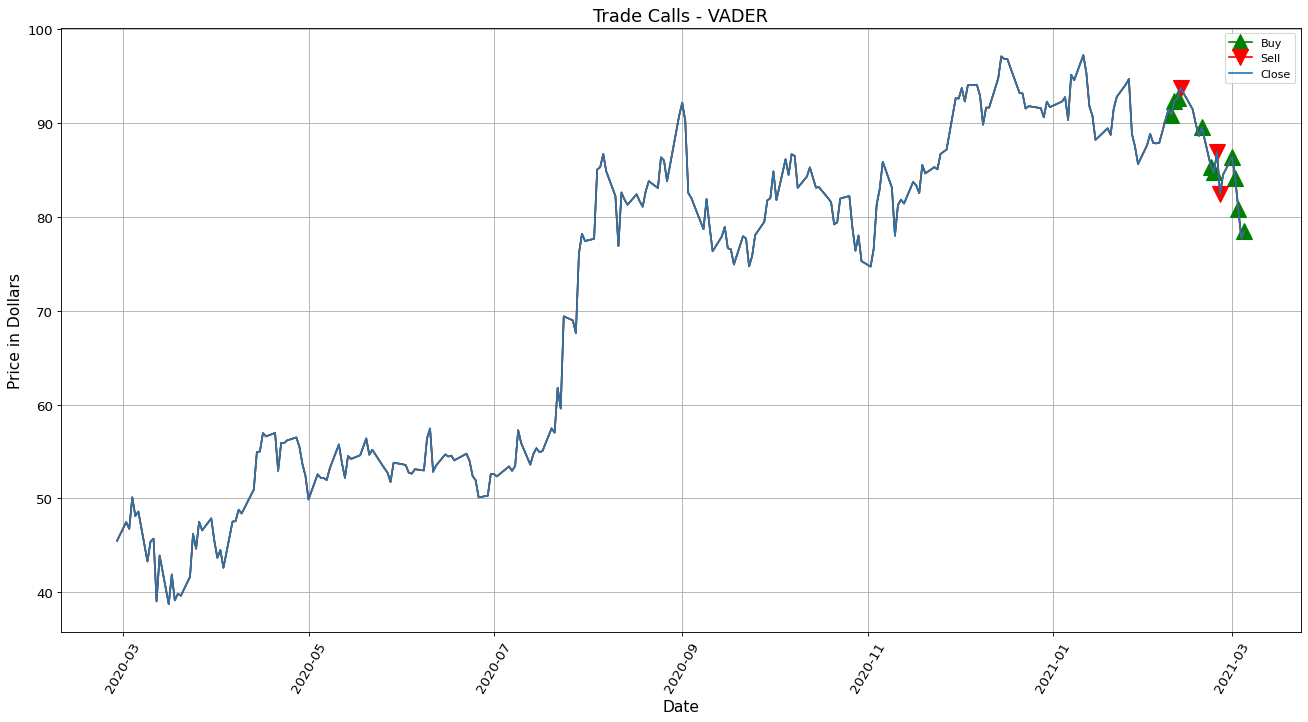

In [ ]:
vader_buy = []
for i in range(len(data_amd)):
    if data_amd.index[i].date() in vader_Buy:
        vader_buy.append(i)
        
vader_sell = []
for i in range(len(data_amd)):
    if data_amd.index[i].date() in vader_Sell:
        vader_sell.append(i)
        
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_amd.index, data_amd['Close'],'-^', markevery=vader_buy, ms=15, color='green')
plt.plot(data_amd.index, data_amd['Close'],'-v', markevery=vader_sell, ms=15, color='red')
plt.plot(data_amd.index, data_amd['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation='60',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - VADER', fontsize = 16)
plt.legend(['Buy','Sell','Close'])
plt.grid()
plt.show() 

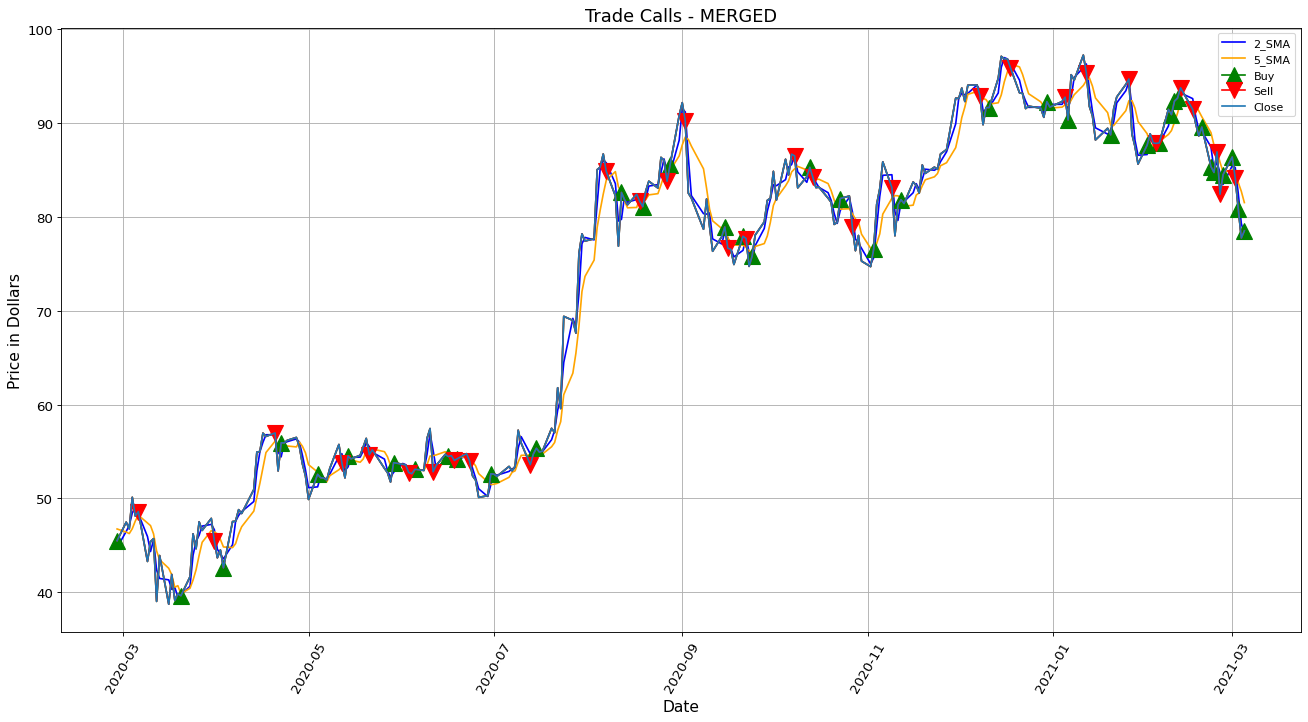

In [ ]:
#prioritising SMA signals
final_buy = list(set(Trade_Buy + vader_buy) - set(Trade_Sell)) 
final_sell = list(set(Trade_Sell + vader_sell) - set(Trade_Buy))

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_amd.index, data_amd['2_SMA'], color='blue')
plt.plot(data_amd.index, data_amd['5_SMA'], color='orange')
plt.plot(data_amd.index, data_amd['Close'],'-^', markevery=final_buy, ms=15, color='green')
plt.plot(data_amd.index, data_amd['Close'],'-v', markevery=final_sell, ms=15, color='red')
plt.plot(data_amd.index, data_amd['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation='60',fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['2_SMA','5_SMA','Buy','Sell','Close'])
plt.grid()
plt.show() 